In [1]:
import mozo2 

import importlib
importlib.reload(mozo2)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from mozo import compare_and_combine_2, Diff, merge_with_features, num_to_range_categories
import pandas as pd
import numpy as np
np.random.seed(0)

import xgboost as xgb

from scipy import stats
import math 
import datetime 

from sklearn.metrics import r2_score, mean_absolute_error
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from functools import partial
import xgboost as xgb
import lightgbm as lgb
import catboost as ctb
from sklearn.svm import SVC

from sklearn.metrics import r2_score, f1_score, mean_absolute_error, mean_squared_error

from scikitplot.estimators import plot_learning_curve

import time
from datetime import datetime


print_plots_by_type(total, type =[np.object])

In [3]:
## modelowanie

In [2]:
# import warnings
# warnings.filterwarnings("ignore")

total = pd.read_csv('~/pml7/konkurs/output/newest_total_20201101_07_20.h5.csv')
total.info(verbose=True)

train_30 = pd.read_hdf('output/train_30.h5', 'data') 
test_car_ids = train_30['car_id'].values

train_70 = total[~total['car_id'].isin(test_car_ids) & ~total['price_value'].isna()]
train_30 = total[total['car_id'].isin(test_car_ids)]

print(len(total.index))
print(len(total[~total['price_value'].isna()].index))

print(train_70['price_value'].isna().sum())
print(train_30['price_value'].isna().sum())

train_100 = total[~total['price_value'].isna()]
print(train_100['price_value'].isna().sum())

global_min = total[~total['price_value'].isna()].price_value.min()

test = total[total['price_value'].isna()]
train = total[~total['price_value'].isna()]


/home/conda/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,86,161) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160616 entries, 0 to 160615
Data columns (total 218 columns):
 #   Column                                                  Dtype  
---  ------                                                  -----  
 0   breadcrumb                                              object 
 1   created_at                                              object 
 2   price_currency                                          object 
 3   price_details                                           object 
 4   price_value                                             float64
 5   seller_address                                          object 
 6   seller_name                                             object 
 7   seller_type                                             object 
 8   feature_czujniki_parkowania_przednie                    bool   
 9   feature_poduszka_powietrzna_chroniąca_kolana            bool   
 10  feature_kurtyny_powietrzne                             

160616
106494
0
0
0


mozo2.print_plots_by_type(total, type = [np.number, bool], min_c = 9.0, max_c = 100., max_values=30)

In [3]:
1+1


2

mea: 2824.3568483899326
r2: 0.9798340084882097
Learning curve for: CatBoostRegressor


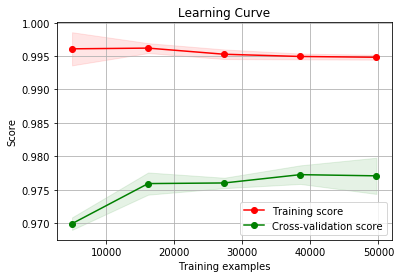

In [6]:
import contextlib
import warnings
warnings.filterwarnings("ignore")
from catboost import CatBoostRegressor
import json


start_vars = np.sort([
# 2776.816641956884
#     'created_at_unix', 'encoded_param_rodzaj_paliwa_2', 'encoded_param_skrzynia_biegów_2', 'encoded_param_typ_2', 'feature_asr__kontrola_trakcji_', 'feature_cd', 'feature_centralny_zamek', 'feature_czujnik_martwego_pola', 'feature_elektrycznie_ustawiane_fotele', 'feature_elektrycznie_ustawiane_lusterka', 'feature_isofix', 'feature_klimatyzacja_automatyczna', 'feature_klimatyzacja_manualna', 'feature_ogrzewanie_postojowe', 'feature_podgrzewane_tylne_siedzenia', 'feature_relingi_dachowe', 'feature_tapicerka_skórzana', 'feature_światła_led', 'feature_światła_przeciwmgielne', 'longitude', 'longitude_na_mean', 'model_8790', 'model_XGBRegressor_3293_22097_', 'new_param_kolor_cat', 'new_param_liczba_pozostałych_rat_cat', 'new_param_marka_pojazdu_cat', 'new_param_oferta_od_cat', 'new_param_opłata_początkowa_cat', 'new_seller_name_cat', 'new_vin_flex_fuel_cat', 'new_vin_model_cat', 'new_vin_portrait_cat', 'new_vin_security_cat', 'ogloszenie_rok', 'param_akryl__niemetalizowany_', 'param_bezwypadkowy', 'param_faktura_vat', 'param_homologacja_ciężarowa', 'param_ile_lat_temu_produkcja', 'param_liczba_miejsc_2', 'param_liczba_pozostałych_rat_2', 'param_matowy', 'param_moc', 'param_perłowy', 'param_pierwsza_rejestracja_10_lat', 'param_pojemność_skokowa', 'param_przebieg', 'param_rok_produkcji', 'param_tuning', 'param_uszkodzony', 'param_vin_len'
# 2778.115628209074
    'created_at_unix', 'encoded_param_rodzaj_paliwa_2', 'encoded_param_skrzynia_biegów_2', 'encoded_param_typ_2', 'feature_asr__kontrola_trakcji_', 'feature_cd', 'feature_centralny_zamek', 'feature_czujnik_martwego_pola', 'feature_elektrycznie_ustawiane_fotele', 'feature_elektrycznie_ustawiane_lusterka', 'feature_gniazdo_sd', 'feature_isofix', 'feature_klimatyzacja_automatyczna', 'feature_klimatyzacja_manualna', 'feature_ogrzewanie_postojowe', 'feature_podgrzewane_tylne_siedzenia', 'feature_relingi_dachowe', 'feature_tapicerka_skórzana', 'feature_światła_led', 'feature_światła_przeciwmgielne', 'longitude', 'longitude_na_mean', 'model_8790', 'model_XGBRegressor_3293_22097_', 'new_param_kolor_cat', 'new_param_liczba_pozostałych_rat_cat', 'new_param_marka_pojazdu_cat', 'new_param_oferta_od_cat', 'new_param_opłata_początkowa_cat', 'new_seller_name_cat', 'new_vin_flex_fuel_cat', 'new_vin_model_cat', 'new_vin_portrait_cat', 'new_vin_security_cat', 'ogloszenie_rok', 'param_akryl__niemetalizowany_', 'param_bezwypadkowy', 'param_homologacja_ciężarowa', 'param_ile_lat_temu_produkcja', 'param_liczba_miejsc_2', 'param_liczba_pozostałych_rat_2', 'param_matowy', 'param_moc', 'param_perłowy', 'param_pierwsza_rejestracja_10_lat', 'param_pojemność_skokowa', 'param_przebieg', 'param_rok_produkcji', 'param_tuning', 'param_uszkodzony', 'param_vin_len'
])

params = {                                                                                     
    "iterations": 100,
    "depth": 8,
#     "learning_rate": 0.23701660211398967,
#     "random_strength": 0.13419513355474952,
#     "bagging_temperature": 0.29043879590002025,
#     "border_count": 78,
#     "l2_leaf_reg": 10,
    "random_state": 6950,
    "silent": True
}


mae, r2, model, model_cl, learning_curve_plot = mozo2.train_and_submit(train_70, train_30, total.loc[total['price_value'].isna(),], 
             start_vars, global_min, 
             CatBoostRegressor, params, digitize=None, subfolder='learning_curves',
             file_sufix = '', opis='', 
             learning_curve = True, 
             add_model_column_min = 3000, total = total, 
             save_min=4000, kaggle_min=-1)


In [69]:
save_dataframe_total()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160616 entries, 0 to 160615
Data columns (total 218 columns):
 #   Column                                                  Dtype  
---  ------                                                  -----  
 0   breadcrumb                                              object 
 1   created_at                                              object 
 2   price_currency                                          object 
 3   price_details                                           object 
 4   price_value                                             float64
 5   seller_address                                          object 
 6   seller_name                                             object 
 7   seller_type                                             object 
 8   feature_czujniki_parkowania_przednie                    bool   
 9   feature_poduszka_powietrzna_chroniąca_kolana            bool   
 10  feature_kurtyny_powietrzne                             

In [6]:
# model = RandomForestRegressor(n_estimators=50, max_depth=7).fit(X_sub_train, y_sub_train) 
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC

shift = 0

perm = PermutationImportance(model).fit(train_30[ start_vars ], (np.log(train_30['price_value'].values) - shift)) 
eli5.show_weights(perm, feature_names=random_feats, top=50) 


/home/conda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/conda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51'] ['encoded_param_napęd_2', 'encoded_param_rodzaj_paliwa_2', 'feature_abs', 'feature_asystent_parkowania', 'feature_centralny_zamek', 'feature_czujnik_deszczu', 'feature_elektrochromatyczne_lusterko_wsteczne', 'feature_elektryczne_szyby_tylne', 'feature_elektrycznie_ustawiane_fotele', 'feature_elektrycznie_ustawiane_lusterka', 'feature_hud__wyświetlacz_przezierny_', 'feature_klimatyzacja_manualna', 'feature_mp3', 'feature_nawigacja_gps', 'feature_odtwarzacz_dvd', 'feature_ogranicznik_prędkości', 'feature_ogrzewanie_postojowe', 'feature_podgrzewana_przednia_szyba', 'feature_podgrzewane_tylne_siedzenia', 'feature_poduszka_powietrzna_kierowcy', 'feature_poduszki_boczne_przednie', 'feature_poduszki_boczne_tylne', 'feature_przyciemniane_szyby', 'feature_radio_fabryczne', 'feature_regulowane_zawieszenie', 'feature_tapicerka_skórzana', 'feature_wielofunkcyjna_kierownica', 'feature_światła_led', 'feature_światła_przeciwmgielne', 'feature_światła_xenonowe', 'model_8790', 'new_param_emisja_co2_cat', 'new_param_kategoria_cat', 'new_param_rodzaj_paliwa_cat', 'new_param_skrzynia_biegów_cat', 'new_param_stan_cat', 'new_param_wersja_cat', 'new_seller_type_cat', 'new_seller_wojewodzctwo_cat', 'new_vin_portrait_cat', 'new_vin_security_cat', 'param_bezwypadkowy', 'param_faktura_vat', 'param_filtr_cząstek_stałych', 'param_liczba_miejsc_2', 'param_liczba_pozostałych_rat_2', 'param_miesięczna_rata_2', 'param_pierwsza_rejestracja_10_lat', 'param_pierwsza_rejestracja_date_na', 'param_przebieg', 'param_serwisowany_w_aso', 'param_vin_len']
expected f34, f51, f43, f31, f32, f24, f11, f30, f37, f38, f12, f39, f20, f42, f19, f2, f50, f3, f27, f48, f35, f7, f29, f4, f9, f14, f36, f46, f16, f47, f5, f6, f15, f28, f21, f40, f33, f22, f17, f13, f44, f45, f23, f41, f18, f0, f8, f25, f26, f1, f10, f49 in input data
training data did not have the following fields: feature_poduszki_boczne_przednie, param_filtr_cząstek_stałych, feature_podgrzewane_tylne_siedzenia, param_przebieg, feature_klimatyzacja_manualna, new_param_kategoria_cat, param_serwisowany_w_aso, encoded_param_rodzaj_paliwa_2, feature_wielofunkcyjna_kierownica, new_param_emisja_co2_cat, new_vin_portrait_cat, feature_światła_led, new_param_wersja_cat, new_param_skrzynia_biegów_cat, new_param_rodzaj_paliwa_cat, feature_poduszki_boczne_tylne, feature_elektrycznie_ustawiane_fotele, feature_elektrochromatyczne_lusterko_wsteczne, model_8790, new_seller_type_cat, feature_światła_przeciwmgielne, feature_poduszka_powietrzna_kierowcy, feature_przyciemniane_szyby, feature_abs, feature_centralny_zamek, new_seller_wojewodzctwo_cat, feature_elektryczne_szyby_tylne, feature_elektrycznie_ustawiane_lusterka, feature_ogrzewanie_postojowe, feature_regulowane_zawieszenie, feature_hud__wyświetlacz_przezierny_, feature_podgrzewana_przednia_szyba, feature_radio_fabryczne, param_bezwypadkowy, param_faktura_vat, param_liczba_pozostałych_rat_2, feature_mp3, param_liczba_miejsc_2, new_param_stan_cat, new_vin_security_cat, param_miesięczna_rata_2, feature_odtwarzacz_dvd, encoded_param_napęd_2, param_pierwsza_rejestracja_date_na, feature_asystent_parkowania, feature_ogranicznik_prędkości, feature_tapicerka_skórzana, param_vin_len, param_pierwsza_rejestracja_10_lat, feature_nawigacja_gps, feature_czujnik_deszczu, feature_światła_xenonowe